<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

#### 1.1 Load Data

In [39]:
# Read CSV
wine_csv = 'winequality_merged.csv'

wine_quality= pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\winequality_merged.csv")

#### 1.2 Explore Data (Exploratory Data Analysis)

In [40]:
# ANSWER
# What does it look like??
wine_quality.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [41]:
# How many rows? columns?
wine_quality.shape

(6497, 13)

### 2. Set Target Variable

Create a target variable for wine quality.

In [42]:
# Target Variable
# Correlations to quality varable:

wine_quality.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


## 3. Set Predictor Variables
###  Step 1 - Assessing Data
Assess the data to answer the following questions to understand the characteristics of the datasets:

* number of samples in each dataset <br>
* number of columns in each dataset <br>
* features with missing values <br>
* duplicate rows in the wine quality dataset <br>
* number of unique values in the dataset <br>
* mean density of the red wine?? - Should these be white wine??


In [43]:
# What are the data types? are there any nulls?
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [44]:
## All categories are numeric - not need to covert columns

## Are there any nulls?
wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [45]:
# create a dataframe to plot data quality
quality_plot = wine_quality["quality"]

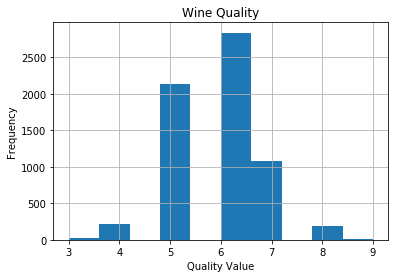

In [46]:
# Plot the Wine Quality
quality_plot.hist()
plt.plot()
plt.xlabel("Quality Value")
plt.ylabel("Frequency")
plt.title("Wine Quality")
plt.show()

In [47]:
# Visualise the wine quality correlations with seaborn
# sns.pairplot(wine_quality)


### * red_wine is a categorical variable which can be removed. <br> The histograms suggest that the data a skewed. This may require further investigation. <br>

In [48]:
# Drop the red_wine boolean:
wine_quality = wine_quality.drop("red_wine", axis=1)
wine_quality.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


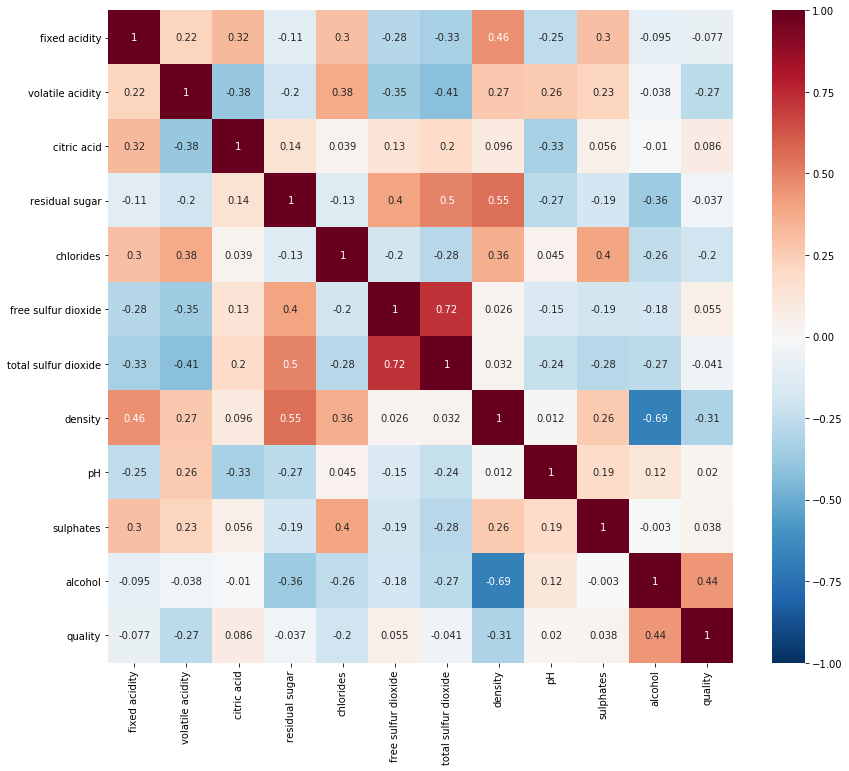

In [49]:
# Correlation Heat Map
correlation = wine_quality.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


In [50]:
# There is two categorical variables: red wine and quality. 
# These variable will be excluded as these variables from the dataset
# Since each feature is a number, so this data is a good fit for linear Regression. 
# Given the set of values for features, we have to predict the quality of wine.

# finding correlation of each feature with our target variable - quality
correlations = wine_quality.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
Name: quality, dtype: float64


### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [51]:
# ANSWER - Create a matrix based on correlation to quality variable 
# This allows changes to be made easily to fine tune the regression model

In [52]:
# Correlation Threshold Function
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [53]:
# Run the function
features = get_features(0.05) 
print(features) 
x = wine_quality[features] 
y = wine_quality['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol']


In [54]:
# The predictor matrix for wine quality
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,alcohol
0,7.4,0.70,0.00,0.076,11.0,0.99780,9.4
1,7.8,0.88,0.00,0.098,25.0,0.99680,9.8
2,7.8,0.76,0.04,0.092,15.0,0.99700,9.8
3,11.2,0.28,0.56,0.075,17.0,0.99800,9.8
4,7.4,0.70,0.00,0.076,11.0,0.99780,9.4
...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,0.039,24.0,0.99114,11.2
6493,6.6,0.32,0.36,0.047,57.0,0.99490,9.6
6494,6.5,0.24,0.19,0.041,30.0,0.99254,9.4
6495,5.5,0.29,0.30,0.022,20.0,0.98869,12.8


### 4. Using Linear Regression Create a Model and Test Score

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [57]:
# Check the test and training datsets have 
x_train.shape
#x_test.shape
#y_train.shape
#y_test.shape

(5197, 7)

In [70]:
# **** This worked ************************************
# Create a model for Linear Regression
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)
# *****************************************************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# Recommended Chek the Regressor Co-Efficient
print(regressor.coef_)

[ 3.74877136e-03 -1.51016807e+00 -2.41552814e-01  3.21997399e-01
  3.41454911e-03  4.38304435e+01  4.09233783e-01]


In [74]:
# From the Solution Notebook:
# Results:
#	feature	coefficient
# 0	density	            40.832975
# 1	volatile acidity	-1.512504
# 2	chlorides	        -0.082437
# 3	alcohol	            0.391877



# Find coefficients - a much better way to display

lr_coef_df = pd.DataFrame({'feature': x_train.columns, 'coefficient': regressor.coef_})
lr_coef_df

,feature,coefficient
0,fixed acidity,0.003749
1,volatile acidity,-1.510168
2,citric acid,-0.241553
3,chlorides,0.321997
4,free sulfur dioxide,0.003415
5,density,43.830443
6,alcohol,0.409234


In [69]:
# Fit and score model on training data
# From the Solution notebook
# lr = LinearRegression()
# lr.fit(X_train, y_train)
# lr.score(X_train, y_train)

# Second Run - did not work cut and paste 
# Solution Notebook Score - 0.2707886547599646
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.2503563369242572

In [61]:
# Calculate the score (R^2 for Regression) for Training Data


In [62]:
# Calculate the score (R^2 for Regression) for Testing Data

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



